### RNN in keras

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print(input_train[1])

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

/home/marchelo/anaconda3/envs/ml.tools/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_3, outputs=sigmoid.0)`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
None


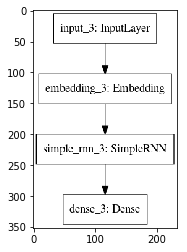

In [5]:
from keras.models import Model
from keras.layers import Dense, Embedding, SimpleRNN, Input
from keras.utils import plot_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

input_l = Input(shape=(maxlen, ))
embedding_l = Embedding(max_features, 32, input_length=maxlen)(input_l)
rnn_l = SimpleRNN(32)(embedding_l)
output_l = Dense(1, activation='sigmoid')(rnn_l)


model = Model(inputs=input_l, output=output_l)
print(model.summary())

# plot graph
plot_model(model, to_file='imag_6.23_simpleRNN&IMDB.png')
image = mpimg.imread('./imag_6.23_simpleRNN&IMDB.png')
plt.imshow(image)
plt.show()


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_simpleRNN = model.fit(input_train, y_train, epochs=10, 
                    batch_size=128, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 559us/step - loss: 0.1201 - acc: 0.9584 - val_loss: 0.4581 - val_acc: 0.8230
Epoch 2/10
20000/20000 [==============================] - 11s 557us/step - loss: 0.0700 - acc: 0.9777 - val_loss: 0.5193 - val_acc: 0.8010
Epoch 3/10
20000/20000 [==============================] - 11s 558us/step - loss: 0.0440 - acc: 0.9872 - val_loss: 0.5634 - val_acc: 0.8102
Epoch 4/10
20000/20000 [==============================] - 11s 558us/step - loss: 0.0291 - acc: 0.9915 - val_loss: 0.5743 - val_acc: 0.8308
Epoch 5/10
20000/20000 [==============================] - 11s 558us/step - loss: 0.0184 - acc: 0.9950 - val_loss: 0.6135 - val_acc: 0.8272
Epoch 6/10
20000/20000 [==============================] - 11s 557us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.6403 - val_acc: 0.8300
Epoch 7/10
20000/20000 [==============================] - 11s 556us/step - loss: 0.0189 - acc: 0.9950 - val_loss: 0.6